In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob
import document_scanner as ds

plt.set_cmap("gray")


<Figure size 432x288 with 0 Axes>

In [2]:
images = [cv.imread(f) for f in glob.glob("img/rot/*_deg.png")]


In [3]:
def prep_subplot(l=len(images)):
    fig, ax = plt.subplots(1, l)
    fig.set_tight_layout(True)

    fig.set_size_inches(24 * 2, 24)
    [a.set_axis_off() for a in ax.ravel()]

    return fig, ax


In [132]:
def get_biggest_contours(img):
    pipe = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, pipe = cv.threshold(pipe, 175, 255, cv.THRESH_BINARY_INV)
    black = np.zeros(img.shape)
    cntrs, h = cv.findContours(pipe, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    return max(cntrs, key=cv.contourArea)


def run_test_one(img):
    cntr = get_biggest_contours(img)
    return cv.drawContours(np.zeros(img.shape), [cntr], -1, (1, 0, 0), 4)


def run_test_two(img):
    cntr = get_biggest_contours(img)
    aprx = ds.approxContours(cntr)
    black = np.zeros(img.shape)
    cv.drawContours(black, [cntr], -1, (0, 0, 1), 16)
    cv.drawContours(black, [aprx], -1, (0, 1, 0), 4)
    for c in aprx:
        cv.circle(black, c[0], 16, (1, 0, 0), 4)
    return black


def run_test_three(img):
    cntr = get_biggest_contours(img)
    aprx = ds.approxContours(cntr)
    pts = ds.getCornerPoints(aprx)
    colors = {"l": (1, 1, 1), "r": (1, 0, 0), "t": (0, 1, 0), "b": (0, 0, 1)}
    black = np.zeros(img.shape)

    for ix, pt in enumerate(aprx):
        cv.circle(black, pt[0], 16, list(colors.values())[ix], 3)

    for key in pts:
        cv.circle(black, pts[key], 6, colors[key], -1)
    return black


def run_test_four(img):
    """use close point to top left corner"""
    cntr = get_biggest_contours(img)
    aprx = ds.approxContours(cntr)
    s_ix = ds.get_smallest_index([ds.distance((0, 0), a[0]) for a in aprx])
    black = np.zeros(img.shape)
    colors = [(1, 1, 1), (1, 0, 0), (0, 1, 0), (0, 0, 1)]

    cv.drawContours(black, [aprx], -1, (0, 1, 0), 4)

    # # aprx = np.roll(aprx, s_ix, axis=0)
    # for ix, pt in enumerate(aprx):
    #     cv.circle(black, pt[0], 16, colors[ix], 3)
    #     cv.circle(black, (0, 0), ds.distance((0, 0), pt[0]), colors[ix], 3)

    for i in range(len(aprx)):
        ix = (i + s_ix) % len(aprx)
        pt = aprx[ix]
        cv.circle(black, pt[0], 16, colors[i], 3)
        cv.circle(black, (0, 0), ds.distance((0, 0), pt[0]), colors[i], 3)

    return black


In [5]:
colors = {"l": (1, 1, 1), "r": (1, 0, 0), "t": (0, 1, 0), "b": (0, 0, 1)}
list(colors.values())[0]


(1, 1, 1)

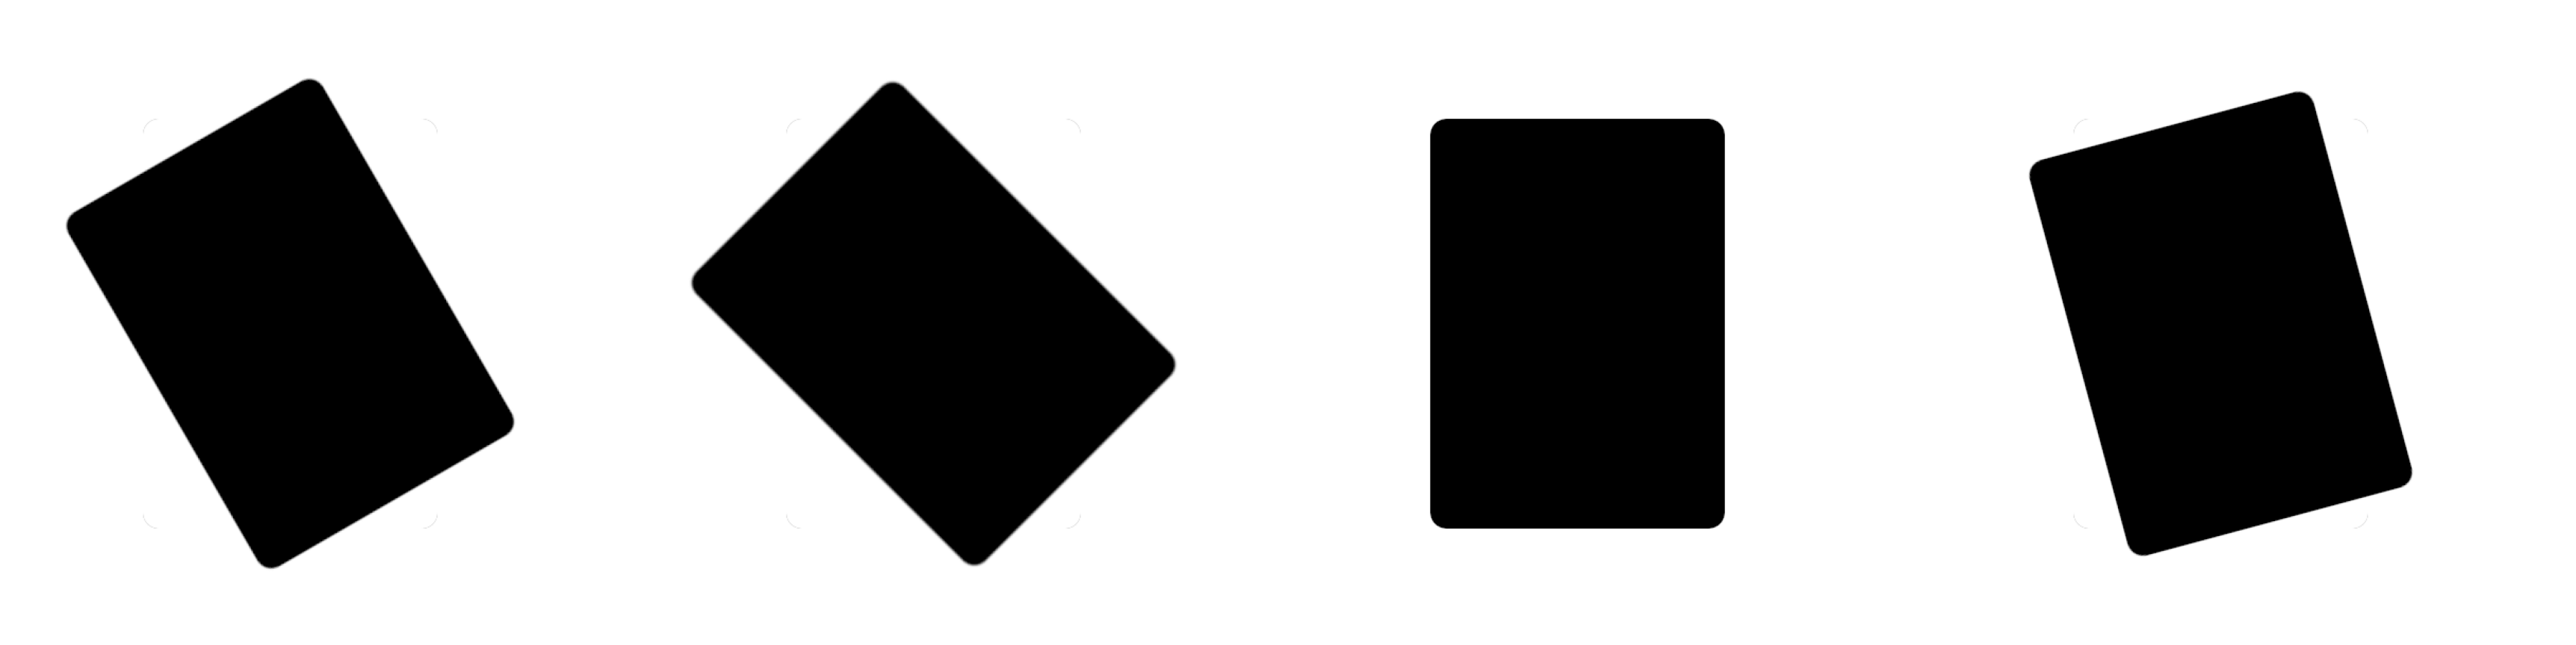

In [36]:
fig, ax = prep_subplot()
_ = [ax[ix].imshow(img[::-1, :, :]) for ix, img in enumerate(images)]


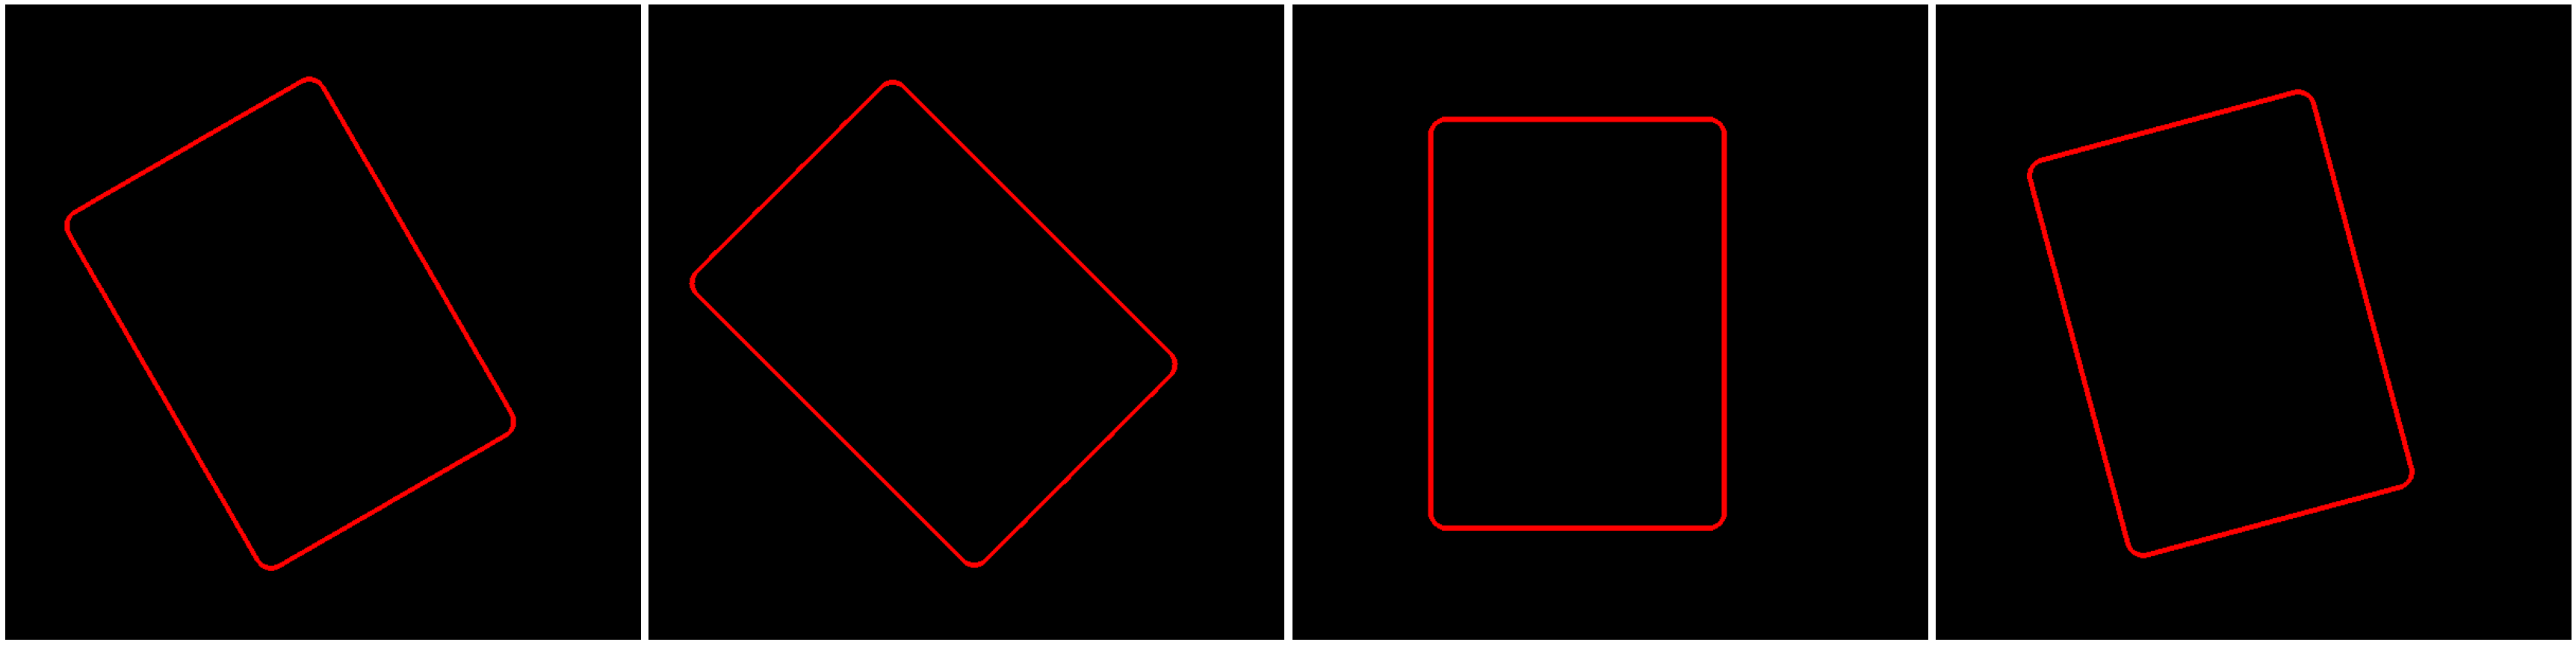

In [38]:
fig, ax = prep_subplot()
_ = [ax[ix].imshow(run_test_one(img[::-1, :, :])) for ix, img in enumerate(images)]


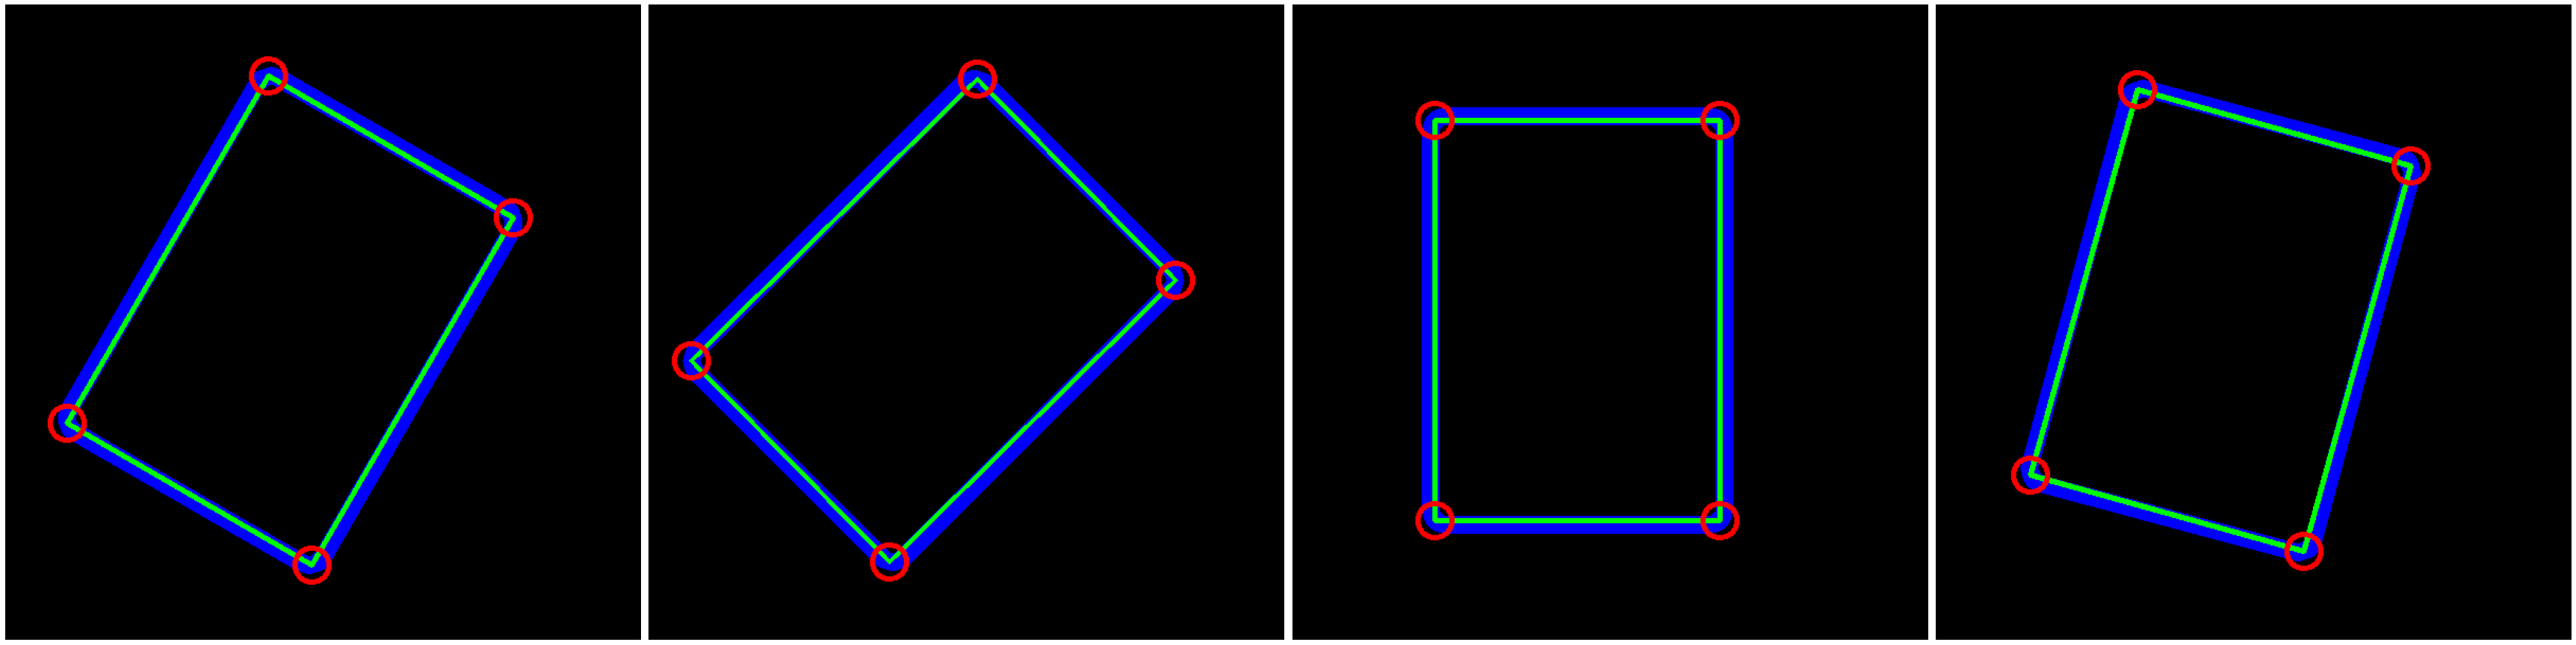

In [105]:
fig, ax = prep_subplot()
_ = [ax[ix].imshow(run_test_two(img)) for ix, img in enumerate(images)]


CPU times: user 114 ms, sys: 13.5 ms, total: 128 ms
Wall time: 80.1 ms


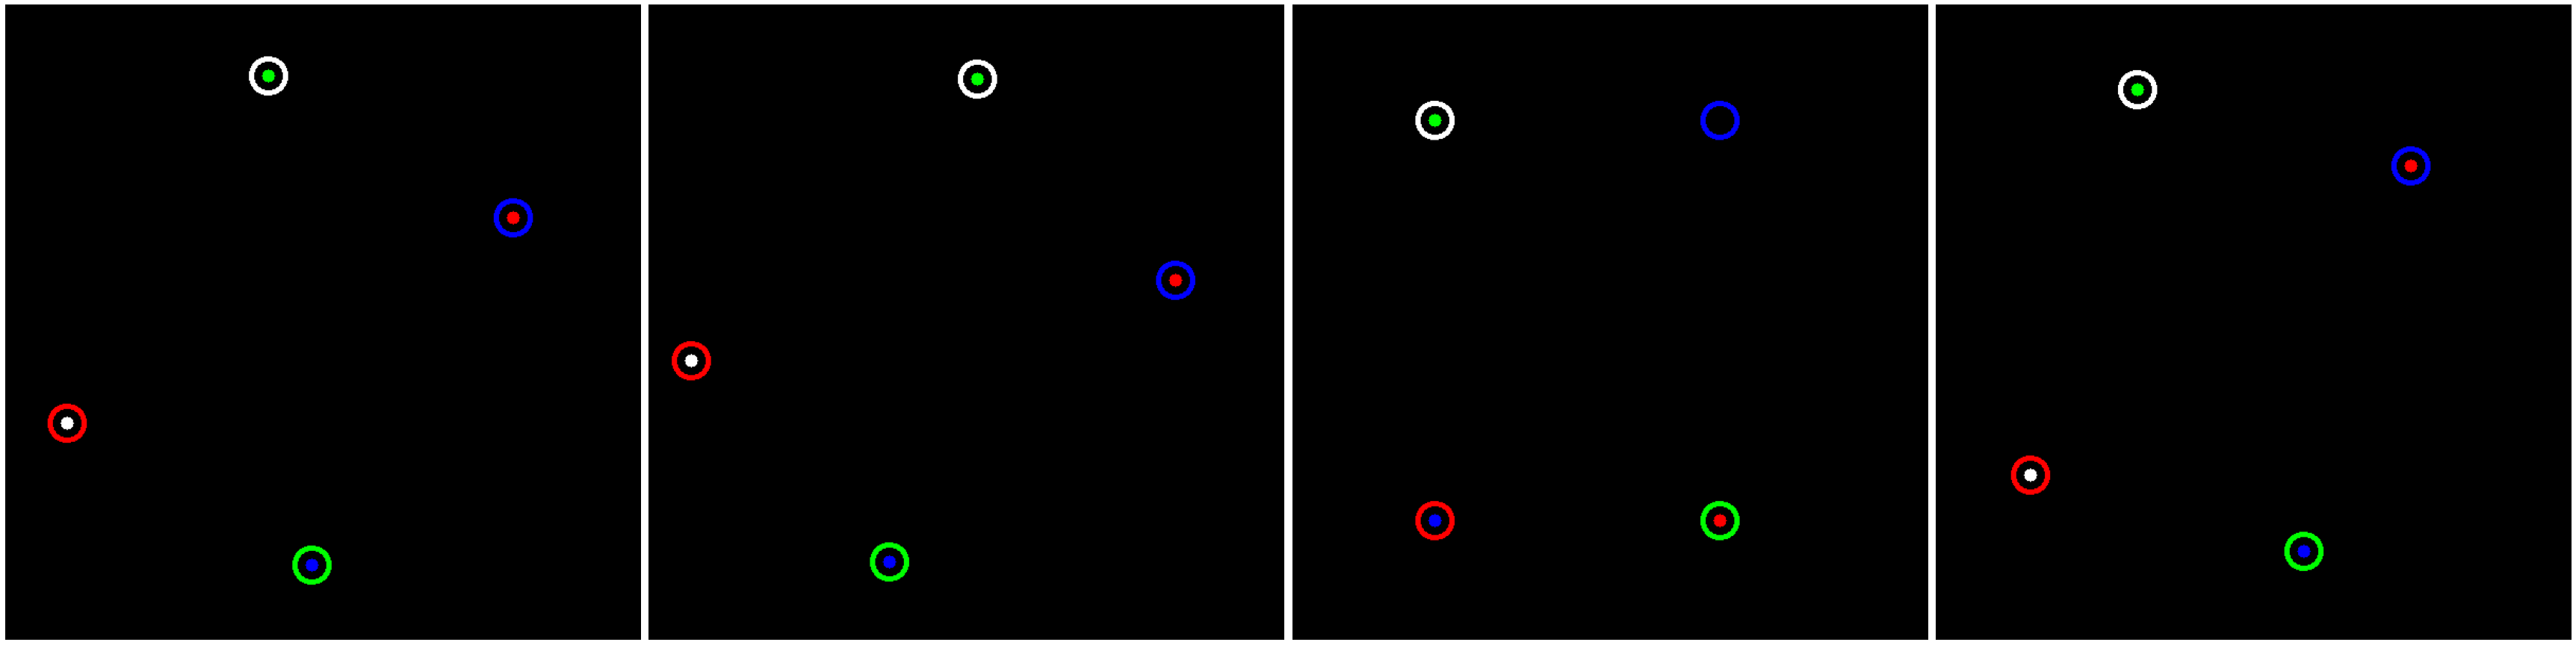

In [110]:
%%time
fig, ax = prep_subplot()
_ = [ax[ix].imshow(run_test_three(img)) for ix, img in enumerate(images)]


CPU times: user 103 ms, sys: 15.4 ms, total: 118 ms
Wall time: 75.4 ms


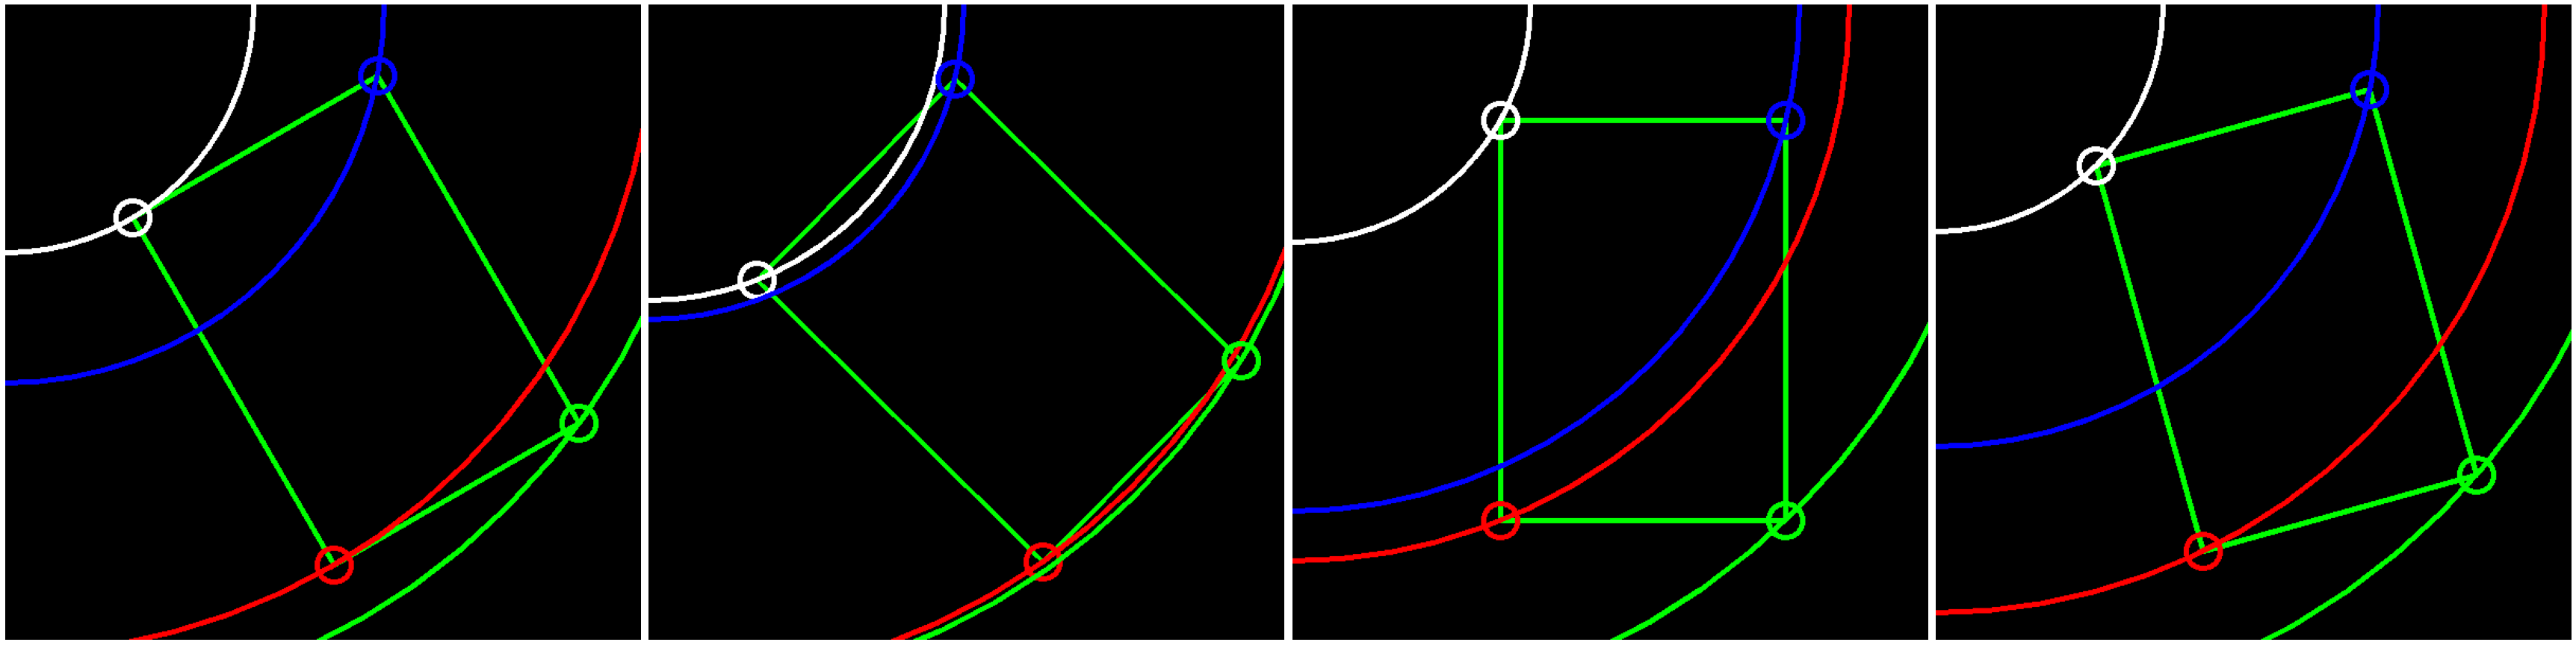

In [135]:
%%time
fig, ax = prep_subplot()
_ = [ax[ix].imshow(run_test_four(img[:,::-1,:])) for ix, img in enumerate(images)]


In [67]:
a = np.array([[3, 1], [2, 2], [1, 3]])

np.roll(a, 2)


array([[1, 3],
       [3, 1],
       [2, 2]])